In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import statsmodels.formula.api as smf
%matplotlib inline

In [2]:
import sys
print(sys.executable)
print(sys.version)
print(sys.version_info)

C:\ProgramData\Anaconda3\python.exe
3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
sys.version_info(major=3, minor=7, micro=6, releaselevel='final', serial=0)


In [3]:
advertising=pd.read_csv('C:/Users/Hyeondo/OneDrive - 연세대학교 (Yonsei University)/data/data_1/Advertising.csv',
                        usecols=[1,2,3,4])
advertising.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
from sklearn.linear_model import LinearRegression

X=advertising.loc[:,:'newspaper']
y=advertising.sales

lr=LinearRegression()
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:
X.head(4)

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5


In [7]:
#MAE, MSE, RMSE 직접 계산
y_hat=lr.predict(X)
errors=y-y_hat
MAE=np.absolute(errors).mean()
MSE=np.square(errors).mean()
RMSE=np.sqrt(MSE)

print('The MAE is: {:.3}'.format(MAE))
print('The MSE is: {:.3}'.format(MSE))
print('The RMSE is: {:.3}'.format(RMSE))

The MAE is: 1.25
The MSE is: 2.78
The RMSE is: 1.67


In [8]:
#skicit-learn metrics 이용한 계산
from sklearn import metrics
print('The MAE is %.2f'%(metrics.mean_absolute_error(y,y_hat)))
print ("The MSE is: {:.3}".format( metrics.mean_squared_error(y, y_hat) )  )
print ("The RMSE is: {:.3}".format( np.sqrt( metrics.mean_squared_error(y, y_hat))))

The MAE is 1.25
The MSE is: 2.78
The RMSE is: 1.67


In [9]:
lr_stats=smf.ols(formula='sales~TV+radio+newspaper',data=advertising).fit()
print ("The MAE is: {:.3}".format( metrics.mean_absolute_error(y, lr_stats.predict(X))))
print('The MSE is: {:.3}'.format(metrics.mean_squared_error(y,lr_stats.predict(X))))
print('The RMSE is: {:.3}'.format(np.sqrt(metrics.mean_squared_error(y,lr_stats.predict(X)))))

The MAE is: 1.25
The MSE is: 2.78
The RMSE is: 1.67


In [10]:
## KNN Regression_Non-parametric Model
from sklearn.neighbors import KNeighborsRegressor
knn_reg=KNeighborsRegressor(n_neighbors=5,n_jobs=-1) #n_neighbors : K
knn_reg.fit(X,y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                    weights='uniform')

In [11]:
y_hat=knn_reg.predict(X) #training performance
print ("The MAE (KNN, K=5) is: {:.3}".format( metrics.mean_absolute_error(y, y_hat)))
print ("The MSE (KNN, K=5) is: {:.3}".format( metrics.mean_squared_error(y,y_hat)))
print ("The RMSE (KNN, K=5) is: {:.3}".format( np.sqrt( metrics.mean_squared_error(y, y_hat))))

The MAE (KNN, K=5) is: 0.803
The MSE (KNN, K=5) is: 1.27
The RMSE (KNN, K=5) is: 1.13


In [12]:
knn_reg = KNeighborsRegressor(n_neighbors=3, n_jobs= -1)
knn_reg.fit(X, y)
y_hat = knn_reg.predict(X)
print ("The MAE (KNN, K=3) is: {:.3}".format( metrics.mean_absolute_error(y, y_hat)))
print ("The MSE (KNN, K=3) is: {:.3}".format( metrics.mean_squared_error(y, y_hat)))
print ("The RMSE (KNN, K=3) is: {:.3}".format( np.sqrt( metrics.mean_squared_error(y, y_hat))))

The MAE (KNN, K=3) is: 0.671
The MSE (KNN, K=3) is: 0.866
The RMSE (KNN, K=3) is: 0.931


In [13]:
knn_reg = KNeighborsRegressor(n_neighbors=11, n_jobs= -1)  
knn_reg.fit(X, y)
y_hat = knn_reg.predict(X)
print ("The MAE (KNN, K=11) is: {:.3}".format( metrics.mean_absolute_error(y, y_hat))) 
print ("The MSE (KNN, K=11) is: {:.3}".format( metrics.mean_squared_error(y, y_hat)))
print ("The RMSE (KNN, K=11) is: {:.3}".format( np.sqrt( metrics.mean_squared_error(y, y_hat))))

The MAE (KNN, K=11) is: 1.1
The MSE (KNN, K=11) is: 2.25
The RMSE (KNN, K=11) is: 1.5


In [14]:
#KNN-Classifier
Caravan=pd.read_csv('C:/Users/Hyeondo/OneDrive - 연세대학교 (Yonsei University)/data/data_1/Caravan.csv'
,index_col=0)
Caravan.shape

(5822, 86)

In [15]:
#Caravan.info()
Caravan.tail()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
5818,36,1,1,2,8,0,6,1,2,1,...,0,0,0,1,0,0,0,0,0,No
5819,35,1,4,4,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,No
5820,33,1,3,4,8,0,6,0,3,5,...,0,0,0,1,0,0,0,0,0,Yes
5821,34,1,3,2,8,0,7,0,2,7,...,0,0,0,0,0,0,0,0,0,No
5822,33,1,3,3,8,0,6,1,2,7,...,0,0,0,0,0,0,0,0,0,No


In [16]:
Caravan.Purchase.value_counts()

No     5474
Yes     348
Name: Purchase, dtype: int64

In [17]:
#Import the KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
X=Caravan.drop(['Purchase'],axis=1)
y=Caravan.Purchase

In [18]:
#Standardize the X
from sklearn import preprocessing
X_scaled=preprocessing.scale(X)
X_scaled.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [19]:
pd.DataFrame(X_scaled,columns=X.columns).head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND
0,0.680906,-0.27258,0.406697,-1.216964,0.779405,-0.694311,0.217444,-0.068711,-0.161816,0.427670,...,-0.20291,-0.073165,-0.081055,-0.05992,0.764971,-0.022706,-0.07365,-0.15062,-0.087348,-0.118816
1,0.992297,-0.27258,-0.859500,-1.216964,0.779405,0.302552,-0.365410,-0.068711,0.464159,-0.096077,...,-0.20291,-0.073165,-0.081055,-0.05992,0.764971,-0.022706,-0.07365,-0.15062,-0.087348,-0.118816
2,0.992297,-0.27258,-0.859500,-1.216964,0.779405,-0.694311,-0.365410,0.914172,0.464159,-1.667319,...,-0.20291,-0.073165,-0.081055,-0.05992,0.764971,-0.022706,-0.07365,-0.15062,-0.087348,-0.118816
3,-1.187437,-0.27258,0.406697,0.010755,-0.970980,1.299414,-0.948264,0.914172,0.464159,-0.619824,...,-0.20291,-0.073165,-0.081055,-0.05992,0.764971,-0.022706,-0.07365,-0.15062,-0.087348,-0.118816
4,1.225840,-0.27258,1.672893,-1.216964,1.479559,0.302552,-0.365410,-0.068711,0.464159,0.427670,...,-0.20291,-0.073165,-0.081055,-0.05992,0.764971,-0.022706,-0.07365,-0.15062,-0.087348,-0.118816


In [20]:
#Train/Test Split 방법으로 성능 평가
#from sklearn.cross)validation import train_test_split
#Response인 y를 dummy encoding하지 않았음
X_train=X_scaled[1000:,:]
y_train=y[1000:]

X_test=X_scaled[:1000,:]
y_test=y[:1000]

In [21]:
knn=KNeighborsClassifier(n_neighbors=1) # K=1
knn.fit(X_train,y_train)

y_pred=knn.predict(X_test) # returns class label
print('Test set error rate:', (y_test != y_pred).mean())

Test set error rate: 0.118


In [22]:
# Baseline accuracy/error_rate

def get_baseline_accuray(y_train, y_test):   # returns (baseline accuracy, label) tuple  
    majority_label = y_train.value_counts().idxmax()
    baseline_acc = y_test.value_counts()[ majority_label ] / len(y_test)
    return((baseline_acc, majority_label))

print("Test set baseline error rate = %s,  with the label = \'%s\'" % 
      (1 - get_baseline_accuray(y_train, y_test)[0], get_baseline_accuray(y_train, y_test)[1]))

Test set baseline error rate = 0.05900000000000005,  with the label = 'No'


In [23]:
# Confusion Matrix와 Classification Metrics, K=1
conf_mat=metrics.confusion_matrix(y_test,y_pred)
print(conf_mat)

[[873  68]
 [ 50   9]]


In [24]:
TP = conf_mat[1,1]
TN = conf_mat[0,0]
FP = conf_mat[0,1]
FN = conf_mat[1,0]

print("Accuracy: ", (TP+TN) / (TP+TN+FP+FN) )
print("Sensitivity: ",  TP / (FN + TP) )
print("Precision: ",  TP / (FP + TP) )
print("False Positive Rate: ",  FP / (FP + TN) )

# metrics function 을 사용할 수도 있음
# print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
# print("Sensitivity: ", metrics.recall_score(y_test, y_pred))
# print("Precision: ", metrics.precision_score(y_test, y_pred))

Accuracy:  0.882
Sensitivity:  0.15254237288135594
Precision:  0.11688311688311688
False Positive Rate:  0.07226354941551541


In [25]:
# Confusion Matrix : KNN, K=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
conf_mat = metrics.confusion_matrix(y_test, y_pred)
print(conf_mat)
TP = conf_mat[1,1]
TN = conf_mat[0,0]
FP = conf_mat[0,1]
FN = conf_mat[1,0]
print("Accuracy: ", (TP+TN) / (TP+TN+FP+FN) )
print("Sensitivity: ",  TP / (FN + TP) )
print("Precision: ",  TP / (FP + TP) )
print("False Positive Rate: ",  FP / (FP + TN) )

[[930  11]
 [ 55   4]]
Accuracy:  0.934
Sensitivity:  0.06779661016949153
Precision:  0.26666666666666666
False Positive Rate:  0.011689691817215728


In [26]:
k_range=range(1,15)
precision_scores=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    conf_mat=metrics.confusion_matrix(y_test,y_pred)
    TP = conf_mat[1,1]
    TN = conf_mat[0,0]
    FP = conf_mat[0,1]
    FN = conf_mat[1,0]
    precision_scores.append(TP/(FP + TP))
    
list(zip(k_range,precision_scores))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in longlong_scalars
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in longlong_scalars
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in longlong_scalars
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in longlong_scalars
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in longlong_scalars
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in longlong_scalars
  if sys.path[0] == '':


[(1, 0.11688311688311688),
 (2, 0.0),
 (3, 0.2),
 (4, 0.0),
 (5, 0.26666666666666666),
 (6, 0.3333333333333333),
 (7, 0.2857142857142857),
 (8, nan),
 (9, 1.0),
 (10, nan),
 (11, nan),
 (12, nan),
 (13, nan),
 (14, nan)]

In [27]:
knn=KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
metrics.confusion_matrix(y_test,y_pred)

array([[939,   2],
       [ 58,   1]], dtype=int64)

In [28]:
knn = KNeighborsClassifier(n_neighbors=12)   
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
metrics.confusion_matrix(y_test, y_pred)

array([[941,   0],
       [ 59,   0]], dtype=int64)

In [29]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression(solver='newton-cg')
log_reg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
#Threshold : 0.5
y_pred=log_reg.predict(X_test)
conf_mat=metrics.confusion_matrix(y_test,y_pred);conf_mat

array([[934,   7],
       [ 59,   0]], dtype=int64)

In [31]:
TP = conf_mat[1,1]
TN = conf_mat[0,0]
FP = conf_mat[0,1]
FN = conf_mat[1,0]
print("Accuracy: ", (TP+TN) / (TP+TN+FP+FN) )
print("Sensitivity(Recall): ",  TP / (FN + TP) )
print("Precision: ",  TP / (FP + TP) )
print("False Positive Rate: ",  FP / (FP + TN) )
# print(metrics.classification_report(y_test, y_pred))

Accuracy:  0.934
Sensitivity(Recall):  0.0
Precision:  0.0
False Positive Rate:  0.007438894792773645


In [32]:
y_pred_prob = log_reg.predict_proba(X_test)   # returns prob of class labels
print(y_pred_prob[:10])
print(y_pred[:10])

[[0.90335714 0.09664286]
 [0.98879582 0.01120418]
 [0.94459535 0.05540465]
 [0.90114387 0.09885613]
 [0.96949768 0.03050232]
 [0.98236642 0.01763358]
 [0.9612243  0.0387757 ]
 [0.99183887 0.00816113]
 [0.96506225 0.03493775]
 [0.9784001  0.0215999 ]]
['No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No']


In [33]:
y_pred_sensitized=['Yes' if prob>0.25 else 'No' for prob in y_pred_prob[:,1]]
conf_mat=metrics.confusion_matrix(y_test,y_pred_sensitized) ; conf_mat

array([[917,  24],
       [ 48,  11]], dtype=int64)

In [34]:
TP = conf_mat[1,1]
TN = conf_mat[0,0]
FP = conf_mat[0,1]
FN = conf_mat[1,0]
print("Accuracy: ", (TP+TN) / (TP+TN+FP+FN) )
print("Sensitivity(Recall): ",  TP / (FN + TP) )
print("Precision: ",  TP / (FP + TP) )
print("False Positive Rate: ",  FP / (FP + TN) )

Accuracy:  0.928
Sensitivity(Recall):  0.1864406779661017
Precision:  0.3142857142857143
False Positive Rate:  0.025504782146652496


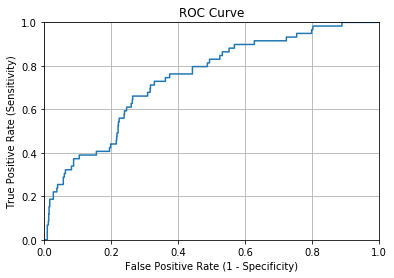

In [35]:
y_test_enc=y_test.map({'No':0,'Yes':1})
fpr, tpr, thresholds=metrics.roc_curve(y_test_enc,y_pred_prob[:,1])
plt.plot(fpr, tpr)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.grid(True)

In [36]:
def get_TPR_FPR_given_Thd(threshold):
    sensitivity_th=tpr[thresholds>threshold][-1]
    fpr_th=fpr[thresholds>threshold][-1]
    return(sensitivity_th,fpr_th)

def get_Threshold_given_TPR(sensitivity):
    return(thresholds[tpr<sensitivity][-1])

print("Threshold=0.05 일 때, sensitivity = %.3f, FPR = %.3f" % 
      (get_TPR_FPR_given_Thd(0.05)[0], get_TPR_FPR_given_Thd(0.05)[1]))
print("TPR=0.746 일 때, threshold = %.3f" % get_Threshold_given_TPR(0.746) )

Threshold=0.05 일 때, sensitivity = 0.746, FPR = 0.362
TPR=0.746 일 때, threshold = 0.050


In [37]:
print(metrics.roc_auc_score(y_test_enc, y_pred_prob[:,1]))

0.7434301770565032


In [38]:
from sklearn.model_selection import cross_val_score

y_enc=y.map({'No':0,'Yes':1})
cross_val_score(log_reg,X,y_enc,cv=7,scoring='roc_auc').mean()

0.7408466367913625

In [39]:
print('exit0')

exit0
